<a href="https://colab.research.google.com/github/AruneshTamboli/Principal-Component-Analysis-on-The-Boston-Housing-Dataset/blob/main/A_Brief_Introduction_to_Principal_component_Analysis_(with_Example_The_Boston_Housing_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps included:


1. we took a quick look at data, got to know all datapoints are compressed in 1 column and present in the form of string. So, in order to make new data we converted, we converted string type into float. then we made new dataset inwhich we had 14 columns. now renmaed those columns as given.


2. Took aquick look then checked null values then checked distribution of datapoints through dist plot. checked distribution of independent variables.


3. to check multi collinearity, plotted heatmap and then found 2 columns which can drive prediction for dependednt variable (double checked through scatter plot) and a bunch of columns which were collinear. got to conclude, those 2 columns we will use for making prediction on dependent variable.

4. applied formulas of linear regression to find best fit line and bam our model is ready to make preiction of dependent variables.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

# **Importing Libraries**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/(Shivalik) Module 4 : Machine Learning 25 08 21/Week 1/4.2 - Linear Regression I/housing.csv")

### First things first, taking a quick look and knowing how data points look like.

In [ ]:
df.shape

(505, 1)

In [ ]:
df.describe(include='all')

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.03584 80.00 3.370 0 0.3980 6.2900 17...
freq,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [ ]:
df.keys()

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

Pandas dataframe.keys() function returns the ‘info axis’ for the pandas object. If the pandas object is series then it returns index. If the pandas object is dataframe then it returns columns. If the pandas object is panel then it returns major_axis.

Here we got to know, we have data in the form of string.

### We have all the values in the form of list of strings which we need to convert to float to make a new Dataset.

In [ ]:
list_of_strings = df.iloc[:,0]

In [ ]:
def map_(k):
  s=[]
  for i in k:
    n=float(i)
    s.append(n)
  return (s)

In [ ]:
a=[]

for i in range(len(list_of_strings)):
  a.append(map_(list_of_strings[i].split()))
print(a)


[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

After converting string to float, assigning column names.

In [ ]:
#assigning column names
new_df = pd.DataFrame(data=a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [ ]:
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


Taking a quick look at data

In [ ]:
new_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Comparing mean and median values, we found that Data points in dependent variable "MEDV" is normally distributed. 
* min value of "MEDV" is 5, max value of "MEDV" is 50.
* From count, we can say there are no missing values.

In [ ]:
new_df.shape

(505, 14)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


Hoorayyyy ! We got no null values !

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


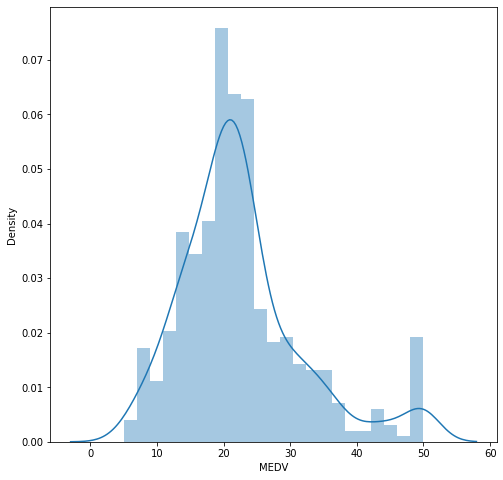

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
sns.distplot(new_df['MEDV'])

### The Distplot of our Depended variable 'MEDV' shows it is normally distributed with some outliers in the right.

## Let's try plotting all independent variables (to find if they are normally distributed)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


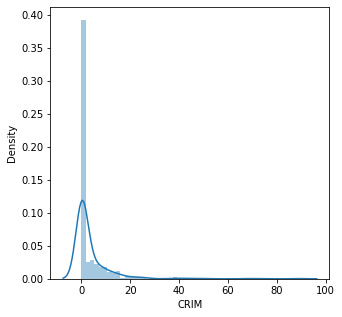

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['CRIM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


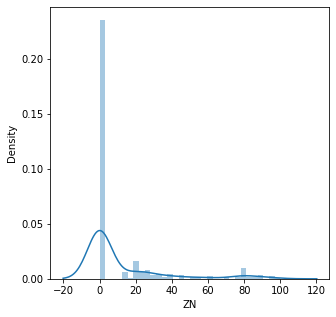

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['ZN'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


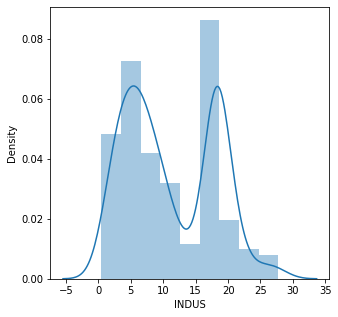

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['INDUS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


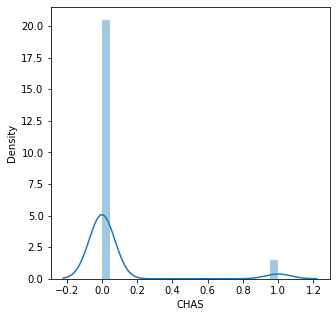

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['CHAS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


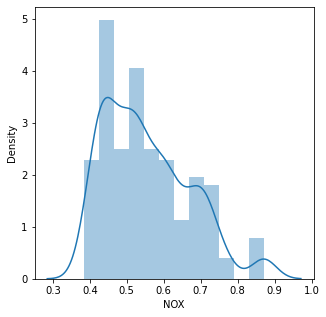

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['NOX'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


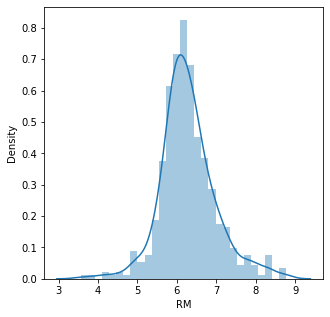

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['RM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


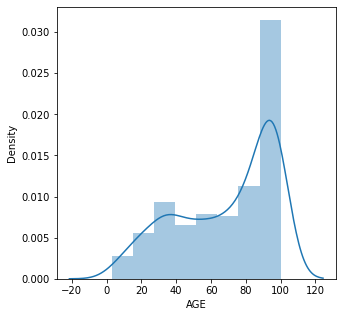

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


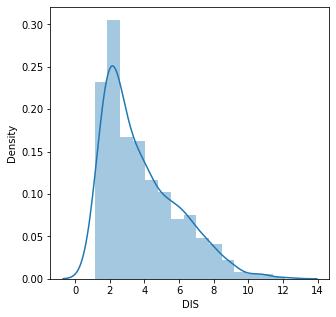

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['DIS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


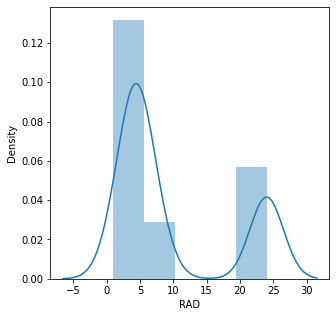

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['RAD'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


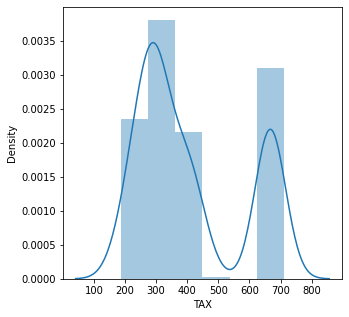

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['TAX'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


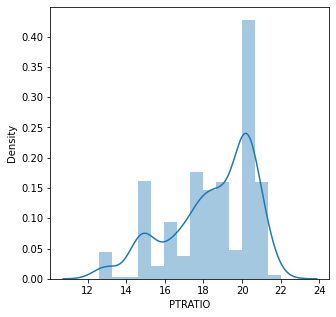

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['PTRATIO'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


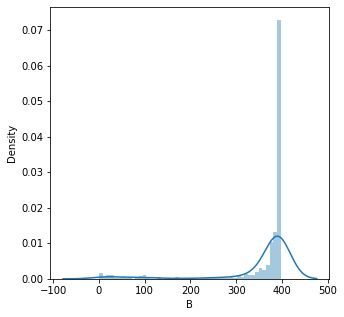

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['B'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


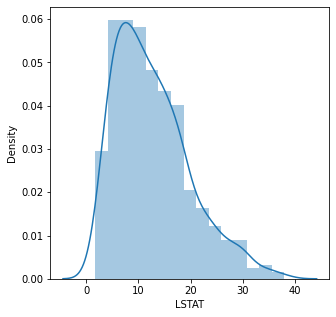

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_df['LSTAT'])

### Let's find Correlation between the dataset

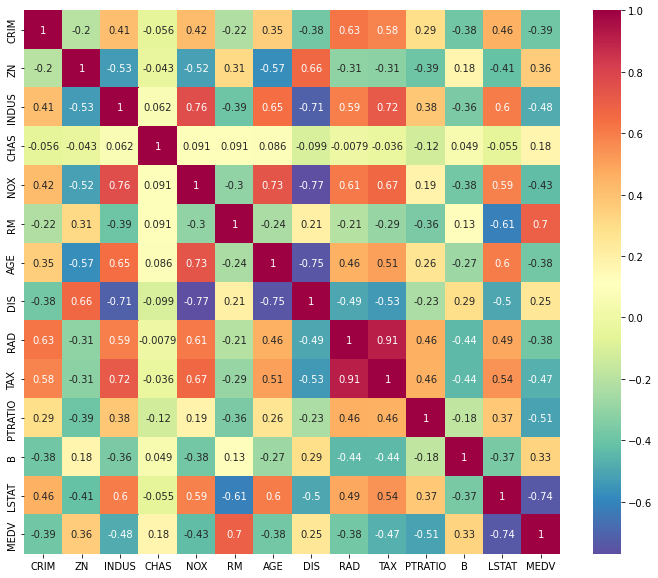

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(), annot = True, cmap='Spectral_r')

### From the above heatmap, we can find relation about the dependent variable.

* MEDV is positively correlated with RM.

* MEDV is negatively correlated with LSTAT.

### For independent variables:

* TAX,RAD has highest positive correlation 0.91

* ZN-INDUS, NOX-AGE has negative correlation of 0.53, 0.77

## We know that to find linear regression, independent and dependent variable must be linearly related.

### Therefore, we can use RM,LASTAT for the same and it would be best to avoid TAX, RAD, ZN,INDUS,NOX,AGE. As there columns exhibit multi collinearity.

**Finding relation between LSTAT and MEDV**

Text(0, 0.5, 'MEDV')

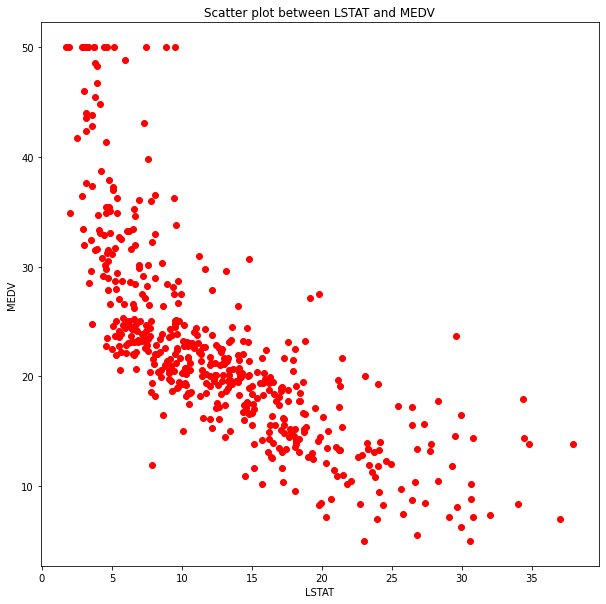

In [ ]:
plt.figure(figsize=(10,10))
x = new_df['LSTAT']
y = new_df['MEDV']

plt.scatter(x,y, color='red')

plt.title('Scatter plot between LSTAT and MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## The above plot shows negative linear regression which seconds the heatmap and makes sense if we see the column we can tell as % lower status of the popluation decreases, no. of owner occupied homes in $1000 would decrease.

Finding relation between RM and MEDV through scatter plot

Text(0, 0.5, 'MEDV')

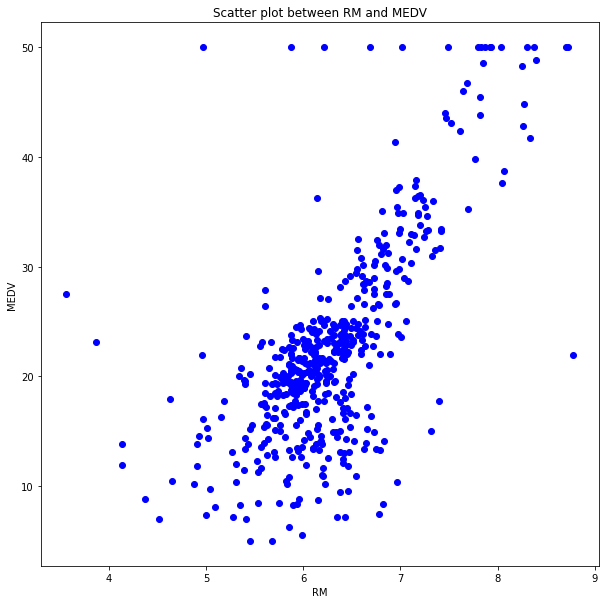

In [ ]:
plt.figure(figsize=(10,10))
x = new_df['RM']
y = new_df['MEDV']

plt.scatter(x,y, color='blue')

plt.title('Scatter plot between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

### The above plot shows positive linear regression which again agrees with heatmap and makes sense if we see column we can tell as avg no. of rooms per dwelling increase, no. of owner occupied homes in $1000 also increase.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


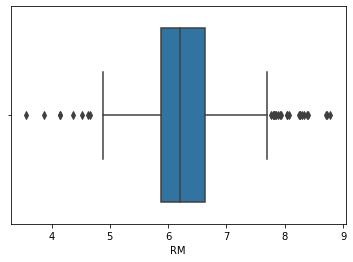

In [ ]:
sns.boxplot(new_df['RM'])

In [ ]:
new_df['RM'].describe()

count    505.000000
mean       6.284059
std        0.703195
min        3.561000
25%        5.885000
50%        6.208000
75%        6.625000
max        8.780000
Name: RM, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


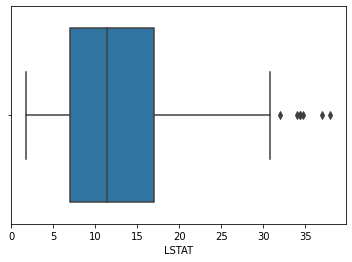

In [ ]:
sns.boxplot(new_df['LSTAT'])

In [ ]:
new_df['LSTAT'].describe()

count    505.000000
mean      12.668257
std        7.139950
min        1.730000
25%        7.010000
50%       11.380000
75%       16.960000
max       37.970000
Name: LSTAT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


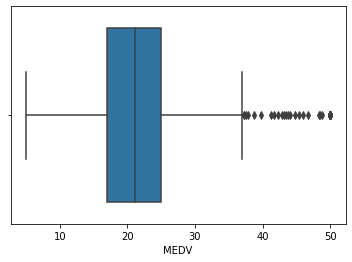

In [ ]:
sns.boxplot(new_df['MEDV'])

In [ ]:
new_df['MEDV'].describe()

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

### From above calculations, we see that RM and LSTAT does not consist lot of outliers. So, we easily consider these columns to make any predictions.

Text(0, 0.5, 'PTRATIO')

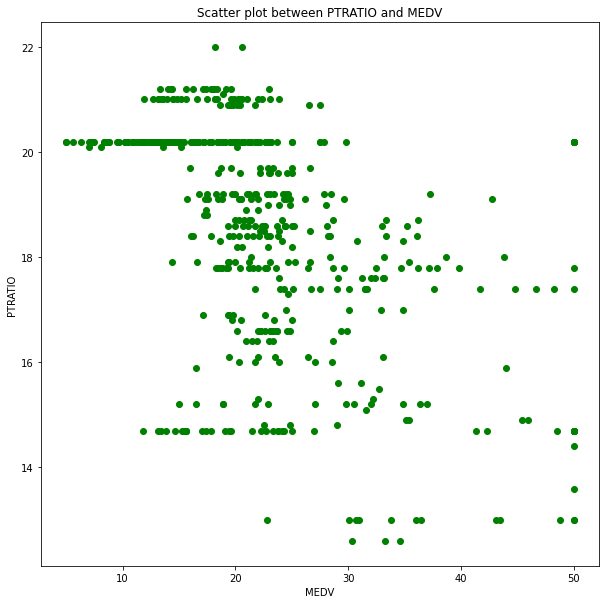

In [ ]:
plt.figure(figsize=(10,10))
x = new_df['MEDV']
y = new_df['PTRATIO']
plt.scatter(x, y,color='green')
plt.title('Scatter plot between PTRATIO and MEDV')
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')

## PTRATIO is the 2nd highest negative correlated value but as per the first assumption, the relationship between independent and dependent variable must be linear, which is not.

## Hence to conclude, LSTAT and RM are the best possible independent variables to make predictions about our dependent variable.

## Calculating the best fit line for MEDV

In [ ]:
rmdf = {'y':new_df['MEDV'],'x':new_df['RM']}
rmdf = pd.DataFrame(rmdf)
rmdf['x2'] = rmdf['x']**2
rmdf['xy'] = rmdf['x'] * rmdf['y']


In [ ]:
rmdf.head()

,y,x,x2,xy
0,21.6,6.421,41.229241,138.6936
1,34.7,7.185,51.624225,249.3195
2,33.4,6.998,48.972004,233.7332
3,36.2,7.147,51.079609,258.7214
4,28.7,6.430,41.344900,184.5410


In [ ]:
n = len(rmdf['y'])
xys=rmdf['xy'].sum()
xs=rmdf['x'].sum()
ys=rmdf['y'].sum()
s=rmdf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs))
print(b1)


0.11239801390640114


In [ ]:
ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print(b0)

21.823585193601446


## now we got the value of coefficients.

## B1= 0.112
### B0=21.82

In [ ]:
bestfit1= (b1*x) + b0

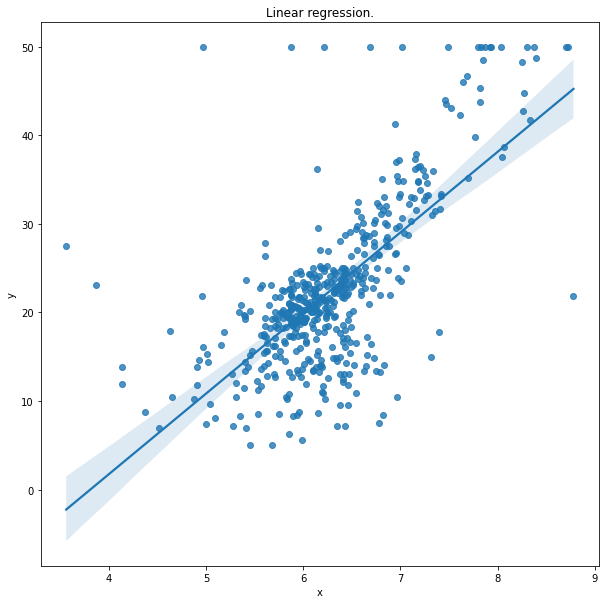

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('RM')
plt.ylabel('MEDV')
sns.regplot(x=rmdf['x'],y=rmdf['y'])

In [ ]:
ldf={'y':new_df['MEDV'],'x':new_df['LSTAT']}
ldf=pd.DataFrame(ldf)
ldf['x2']= ldf['x']**2
ldf['xy']= ldf['x']*ldf['y']

In [ ]:
n= len(ldf['y'])
xys=ldf['xy'].sum()
xs=ldf['x'].sum()
ys=ldf['y'].sum()
s=ldf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs))
print(b1)

-0.22913670172915626


In [ ]:
ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print(b0)

25.432663713289553


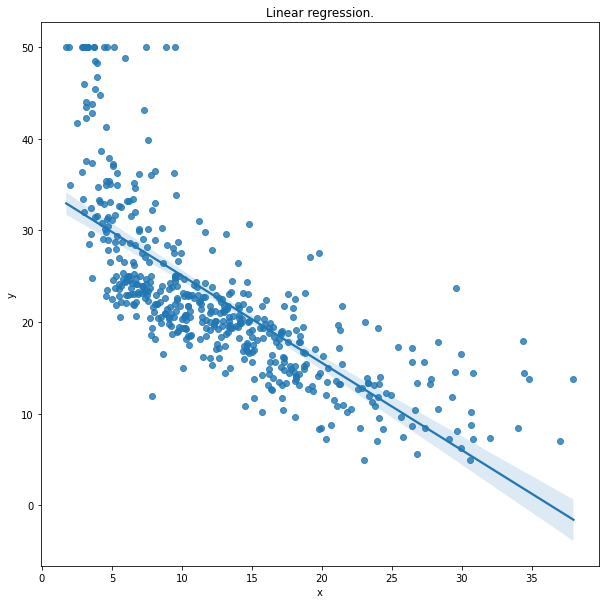

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
sns.regplot(x=ldf['x'],y=ldf['y'])

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

In [ ]:
x = new_df.iloc[:,:13]  #features
y = new_df.iloc[:,13] #target
x.shape, y.shape

((505, 13), (505,))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(x)
pca.get_covariance()

array([[ 7.41075085e+01, -4.02481581e+01,  2.39766430e+01,
        -1.22846962e-01,  4.20306696e-01, -1.32558459e+00,
         8.55505748e+01, -6.88825059e+00,  4.68794024e+01,
         8.45692882e+02,  5.38741440e+00, -3.02693307e+02,
         2.79866700e+01],
       [-4.02481581e+01,  5.44928497e+02, -8.54656618e+01,
        -2.52514537e-01, -1.39869807e+00,  5.11882636e+00,
        -3.74598890e+02,  3.26901532e+01, -6.33615904e+01,
        -1.23742622e+03, -1.97741775e+01,  3.73932193e+02,
        -6.88182769e+01],
       [ 2.39766430e+01, -8.54656618e+01,  4.70029308e+01,
         1.08672599e-01,  6.07985237e-01, -1.88660714e+00,
         1.24701731e+02, -1.02432154e+01,  3.54704809e+01,
         8.33044231e+02,  5.64802414e+00, -2.23317476e+02,
         2.95043134e+01],
       [-1.22846962e-01, -2.52514537e-01,  1.08672599e-01,
         6.46314631e-02,  2.68733302e-03,  1.63569857e-02,
         6.19334433e-01, -5.31076418e-02, -1.75035361e-02,
        -1.54182383e+00, -6.73856671e

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([8.05684928e-01, 1.63172861e-01, 2.13641261e-02, 6.96076630e-03,
       1.30075791e-03, 7.25707412e-04, 4.19304216e-04, 2.47163553e-04,
       8.52585556e-05, 3.08246033e-05, 6.65371631e-06, 1.56869516e-06,
       7.96821517e-08])

Visualizations

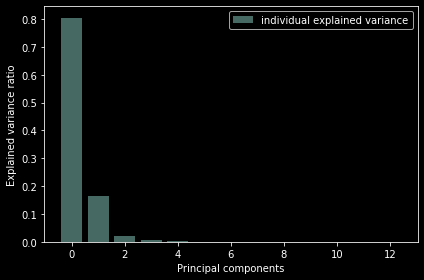

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(13), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca = PCA(n_components=3)
X = pca.fit_transform(x)

Train Test Split
The train test split is a common training and evaluation method. Usually, predictions on the trained data itself can lead to overfitting, thus giving bad results for unknown data. In this case, by splitting the data into training and test sets, you train and then predict using the model on 2 different sets, thus resolving the issue of overfitting.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(404, 3)
(101, 3)


Model Training
Our aim is to identify the class/species to which the flower belongs given some of its features. Hence this is a classification problem and the model we use is using K Nearest Neighbors.

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[12:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Predictions


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb





In [ ]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [ ]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7684822846497894
MSE : 19.649874809078206
RMSE : 4.432817930964253
R2 : 0.7684822846497894
Adjusted R2 : 0.7613219429379272


In [ ]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 45.47924316686649
RMSE : 6.7438300072634165
R2 : 0.4506243509038269
Adjusted R2 : 0.43363335144724424


Conclusion
I really hope you might have got intuition about PCA and also been familiar with the example discussed above. It’s not that complex to digest, just keep focus. Make sure you read this once again if you find this useful and work out the algorithm by yourself for better understandings.

Have a nice day !! : )  